# Computer Vision - Project

In [1]:
#Importing all the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input, MobileNet
from tensorflow.keras.layers import Concatenate, Conv2D, Reshape, UpSampling2D, ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau 

from PIL import Image

from google.colab.patches import cv2_imshow

from zipfile import ZipFile
import glob
import cv2
import os
import warnings
warnings.filterwarnings('ignore')
import gc
import copy

## Face Detection - Using Pre-Trained Model to generate Metedata

### 1. Read/import images from folder ‘training_images’. [2 Marks]

In [31]:
#Reading the folder
training_images = '/content/drive/MyDrive/Python - Collab/12. Module-9_Computer Vision/Computer Vision - Project/training_images.zip'

#Unzipping the 'training_images' folder
with ZipFile(training_images, 'r') as z:
  z.extractall()

In [32]:
#Getting the path of the images
image_path = '/content/training_images'
image_list = os.listdir(image_path)

### 2. Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images. [3 Marks]

### 3. From the same loop above, extract metadata of the faces and write into a DataFrame. [3 Marks]

##### Combining the answer to Que2 & Que3.

In [33]:
#Loading the face detection model
trained_face_data = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

train_images = [] #To store the resized images
train_img_labels = [] #To store the labels of images
face_detect_img = [] #To store the images detecting faces
metadata = pd.DataFrame(columns = ['x', 'y', 'w', 'h', 'Total_Faces', 'Image_Name']) #Storing Metadata of the images

#Writing a function:
#1. That itetrates through all the image in 'training_images' & detect the faces present on them.
#2. That extracts the metadata of the faces & writig it into a dataframe.

def detect_faces(path, list):
  for i in range(len(list)):
    img = cv2.imread(os.path.join(path, list[i]))
    height = 224
    width = img.shape[1]*height/img.shape[0] #Here we can give 224 as width size as all the images have same height & width but if the height & 
                                             #width are different in original image, we need to maintain the aspect ratio, hence the width equation.
    img = cv2.resize(img, (height, int(width)), interpolation=cv2.INTER_AREA)
    train_images.append(img)
    train_img_labels.append(list[i])
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_coordinates = trained_face_data.detectMultiScale(gray_img)
    a = []
    for coordinates in face_coordinates:
      (x, y, w, h) = coordinates
    face_detect = img.copy()
    face_detect = cv2.rectangle(face_detect, (x, y), (x+w, y+h), (0, 255, 0), 3)
    face_detect_img.append(face_detect)
    a.append([x+w/2, y+h/2])
    metadata.loc[i] = (int(x), int(y), int(w), int(h), int(len(a)), train_img_labels[i])
    cv2.waitKey(0)

In [34]:
#Calling the Function on the path & list with data of 'training_images'
detect_faces(image_path, image_list)

Random Image Number is: 226 

The Original Image in the list with number [226] is:


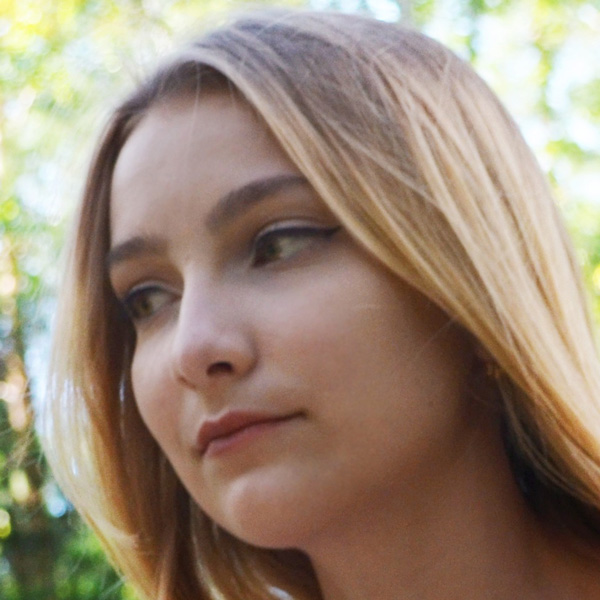



The Resized Image in the list with numer [226] is:


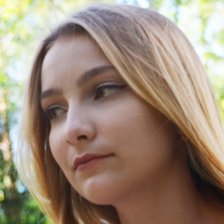



The Resized Image  with number [226] Detecting Face:


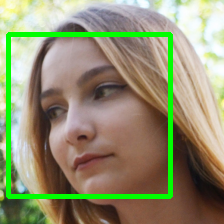

In [35]:
#Generating a random integer & displaying the original image, resized image & resized image with face detected.
n = np.random.randint(0, 1092, 1) #Generating a random integer
print('Random Image Number is: {}'.format(int(n)), '\n')

#Displaying Original Image
print('The Original Image in the list with number {} is:'.format(n))
cv2_imshow(cv2.imread(os.path.join(image_path, image_list[int(n)])))
print('\n')

#Displaying Resized Image
print('The Resized Image in the list with numer {} is:'.format(n))
cv2_imshow(train_images[int(n)])
print('\n')

#Displaying Resized Image with face detected
print('The Resized Image  with number {} Detecting Face:'.format(n))
cv2_imshow(face_detect_img[int(n)])

In [36]:
#Dispalying the dataframe generated 'Metadata'
metadata

,x,y,w,h,Total_Faces,Image_Name
0,27,57,153,153,1,real_00781.jpg
1,26,55,157,157,1,real_00291.jpg
2,55,48,150,150,1,real_00796.jpg
3,31,60,138,138,1,real_00735.jpg
4,51,47,160,160,1,real_00690.jpg
...,...,...,...,...,...,...
1086,37,66,134,134,1,real_00617.jpg
1087,33,46,144,144,1,real_00651.jpg
1088,10,35,171,171,1,real_01010.jpg
1089,10,35,171,171,1,real_00105.jpg


#### 4. Save the output Dataframe in .csv format. [2 Marks]

In [37]:
#Saving the output dataframe in '.csv' format
metadata.to_csv('Training_Images_Metadata.csv', index=False)